<a href="https://colab.research.google.com/github/The-Man-Bat/AnimalFriendsSUI2021-main/blob/main/Copy_of_right_sided_2categories_roc_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
import base64
import os

# Cats and dogs images AI is invoked using this function
def get_prediction(image_data):
  url = 'https://askai.aiclub.world/d00a3c7b-c2aa-4d92-b082-8160dc84bcec'
  r = requests.post(url, data=image_data)
  raw_response = getattr(r,'_content').decode("utf-8")
  response = json.loads(raw_response)
  return response


In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to folder where the images are located
PATH = '/content/drive/Shareddrives/1:1 Dhruv Sastry/Dataset_forROC'

# Get label names from it
labels = next(os.walk(PATH))[1]
print('Labels are: ', labels)

# this can be flipped if desired
positive_class = 0
positive = labels[positive_class]

Labels are:  ['Normal', 'Category2']


In [ ]:
y_truth = []

# count number of images in the subfolders
num_images = 0
for label in labels:
  sub_folder_path = PATH + '/' + label
  # Find all images in a given label
  files = [f for f in os.listdir(sub_folder_path) if os.path.isfile(os.path.join(sub_folder_path, f))]
  # Add them to count
  num_images += len(files)

# Initialize the score variable to be size of the number of test images
y_score = np.zeros((num_images,2))

# Iterate over all the images
sample = 0
TP = 0
TN = 0
FN = 0
FP = 0
# Iterate over one label at a time
for label in labels:
  count = 0
  sub_folder_path = PATH + '/' + label
  files = [f for f in os.listdir(sub_folder_path) if os.path.isfile(os.path.join(sub_folder_path, f))]
  # Iterate over all images in each label
  for image_name in files:
    image_path = sub_folder_path + '/' + image_name
    # Read individual image and send to AI
    with open(image_path, "rb") as image:
      payload = base64.b64encode(image.read())
    response = get_prediction(payload)
    # Fetch the score
    score = response['score']
    prediction = response['predicted_label']
    count = count + 1
    print(count)
    # Assign score to the y_score variable, this will be used for ROC in future
    y_score[sample,:] = score
    sample += 1
    # Append with 0 and 1 label
    # We have assumed here that labels[0] is assigned 0, you can flip it
    if label == labels[0]:
      y_truth.append(0)
    else:
      y_truth.append(1)
    if positive == prediction and positive == label:
      TP += 1
    elif positive == prediction and positive != label:
      FP += 1
    elif positive != prediction and positive == label:
      FN += 1
    elif positive != prediction and positive != label:
      TN += 1




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


{0: 0.9603553086678546, 1: 0.03964469133214547}


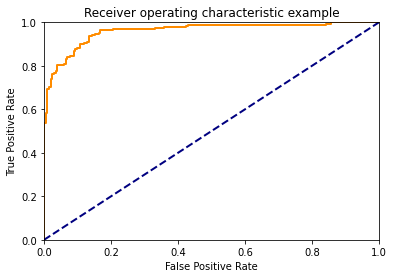

In [ ]:
# ROC curve
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
# roc curve API: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_truth, y_score[:,i], pos_label = i)
    fpr[i], tpr[i], thresholds = roc_curve(y_truth, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)



# Compute the ROC curve
plt.figure()
plt.plot(fpr[positive_class], tpr[positive_class], color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()


In [ ]:
# Confusion Matrix
print('True Positives: ', TP)
print('True Negatives', TN)
print('False Positives: ', FP)
print('False Negatives: ', FN)

True Positives:  185
True Negatives 159
False Positives:  29
False Negatives:  18
